# Regression with Neural Networks with Tensorflow
Predicting a numerical variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

2024-03-10 19:33:47.376409: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 19:33:47.379020: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 19:33:47.416370: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 19:33:48.098108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.16.1'

## Creating data to view and fit

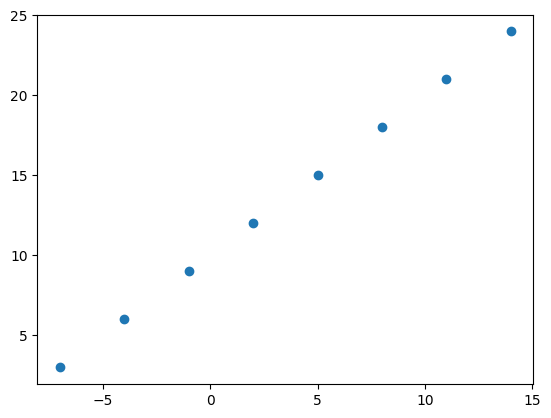

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize 
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn NumPy arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

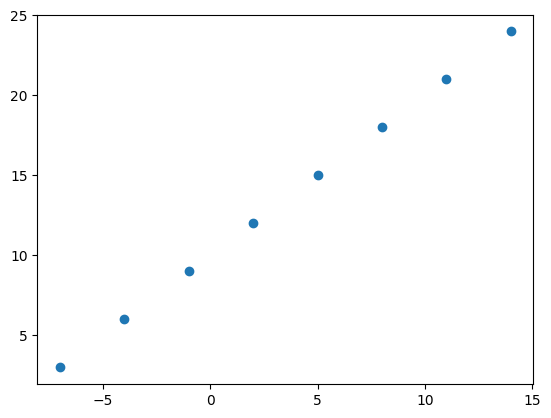

In [12]:
plt.scatter(X, y)

## Steps in modeling with tensorflow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define a loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learing) and evaluation metrics (what we can use to interpret the preformance of our model).
3. Fitting a model - letting the model try to find patterns between X and y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 10.5136 - mae: 10.5136
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.3811 - mae: 10.3811
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.2486 - mae: 10.2486
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.1161 - mae: 10.1161
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.9836 - mae: 9.9836


In [14]:
# Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[17.530201]], dtype=float32)

In [16]:
y_pred + 9.28

array([[26.8102]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. Creating a model - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. Compiling a model - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 13.5607 - mae: 13.5607
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13.4282 - mae: 13.4282
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13.2957 - mae: 13.2957
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13.1632 - mae: 13.1632
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.0307 - mae: 13.0307
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.8982 - mae: 12.8982
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.7657 - mae: 12.7657
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.6332 - mae: 12.6332
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.5007 - mae: 12.5007
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.3682 - mae: 12.3682
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.2357 - mae: 12.2357
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.1032 - mae: 12.1032
Epoch 13/100
1/1 ━━━━━━━

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[29.732609]], dtype=float32)

In [20]:
# Rebuild model adding a hidden layer in a model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 13.2378 - mae: 13.2378
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.6569 - mae: 12.6569
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.0700 - mae: 12.0700
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.4803 - mae: 11.4803
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.8805 - mae: 10.8805
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.2617 - mae: 10.2617
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.6230 - mae: 9.6230
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.9585 - mae: 8.9585
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.2641 - mae: 8.2641
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.5284 - mae: 7.5284
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.7404 - mae: 6.7404
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.8987 - mae: 5.8987
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [21]:
# Let's see prediction after adding a hidden layer
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[31.830715]], dtype=float32)

In [22]:
# Rebuild model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - loss: 14.1154 - mae: 14.1154
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.3823 - mae: 13.3823
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.6566 - mae: 12.6566
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.9365 - mae: 11.9365
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.2198 - mae: 11.2198
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.5036 - mae: 10.5036
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.7847 - mae: 9.7847
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.0594 - mae: 9.0594
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.3241 - mae: 8.3241
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.5749 - mae: 7.5749
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.8081 - mae: 6.8081
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.5774 - mae: 6.5774
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [23]:
model.predict(np.array([17.]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[27.354425]], dtype=float32)

### Learning rate is one of most important parameters in netural networks

## Evaluating a model

In practice, a typical workflow when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fir it -> evaluate it -> tweak a model -> ...

When it comes to evaluation **visualization** is important

It's good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does a model look like
* The training of a model - how does the model perform while it learns?
* The predictions of the model - how do predictions of a model line up against the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

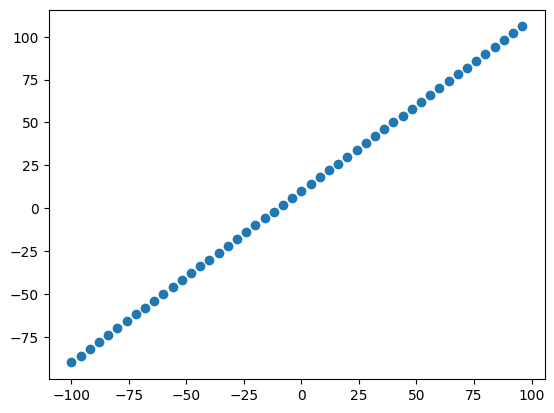

In [26]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

## The 3 sets

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets

X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]  # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's vizualize it again

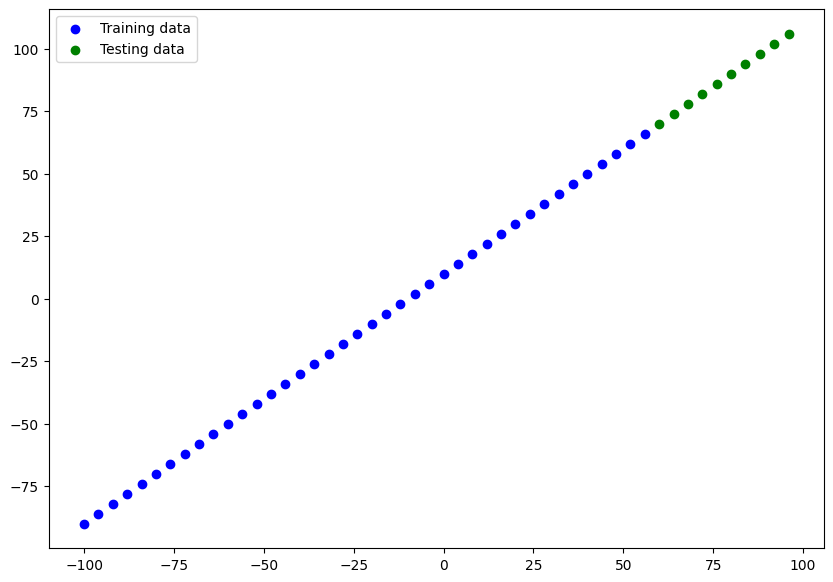

In [29]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend()


In [30]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [31]:
# Let's have a look how to build a neural network for our data

# Let's create a model which builds automatically by defining the input_shape argument in the first layer
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=[1]),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

## Visualizing a model

In [32]:
# model.build() will throw ValueError: You must provide an `input_shape` argument. if not specified

model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during transfer learning)

In [33]:
# Fit a model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.3735 - mae: 48.1055  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.5520 - mae: 41.0587 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.7747 - mae: 34.0602 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.9953 - mae: 27.0866 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.1621 - mae: 20.0590 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.5602 - mae: 13.1348 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4130 - mae: 6.6845 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0495 - mae: 5.7194 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8303 - mae: 8.8889 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0305 - mae: 9.3239 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2094 - mae: 7.6169 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2667 - mae: 5.3375 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

In [34]:
from tensorflow.keras.utils import plot_model

# plot_model(model) doesn't work currently: AttributeError: module 'pydot' has no attribute 'InvocationException'

## Visualizing model's predictions

To visualize, it's a good idea to plot them against the grand truth labels.

Often it's seen in a form of 'y_test' or 'y_true' versus 'y_pred' (grand truth versus model predictions)

In [35]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[ 70.36265 ],
       [ 74.42025 ],
       [ 78.481926],
       [ 82.5538  ],
       [ 86.6257  ],
       [ 90.69757 ],
       [ 94.76947 ],
       [ 98.84135 ],
       [102.913246],
       [106.98512 ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
# Creating a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """ Plots training data, test data and compares it to grand truth """
    plt.figure(figsize=(10, 7))
    
    # Plot training data
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    
    # Plot testing data
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    
    # Plot model's predictions
    plt.scatter(test_data, predictions, c="y", label="Predictions")
    
    # Show a legend
    plt.legend()

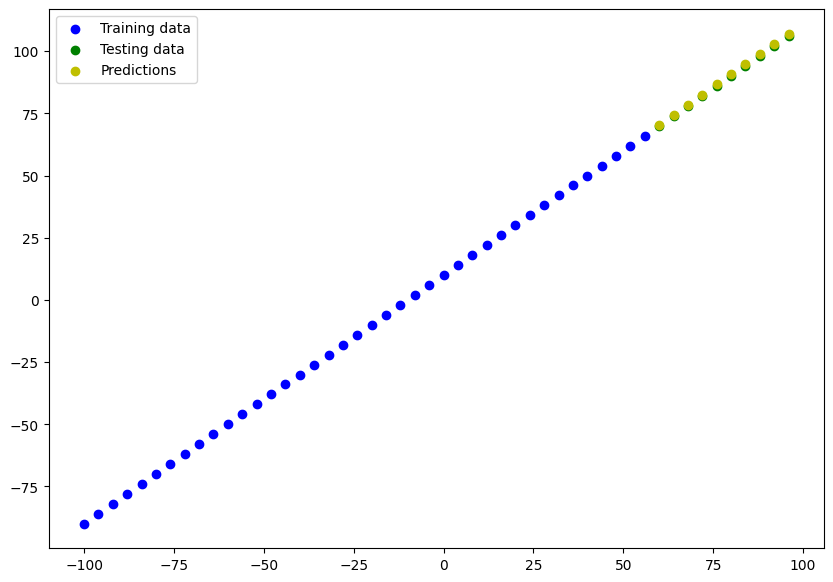

In [40]:
plot_predictions()